In [286]:
import seaborn as sns 
import matplotlib.pyplot as plt 

## Heat map

In [287]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [288]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [289]:
tipscorr  = tips[['total_bill','tip','size']]

In [290]:
tipscorr

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [291]:
tipscorr.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

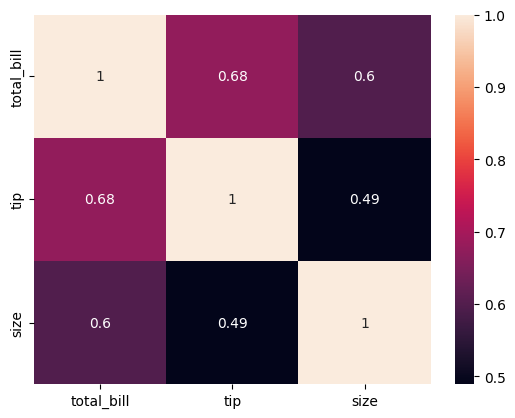

In [292]:
sns.heatmap(tipscorr.corr(),annot= True)

## Cluster map 

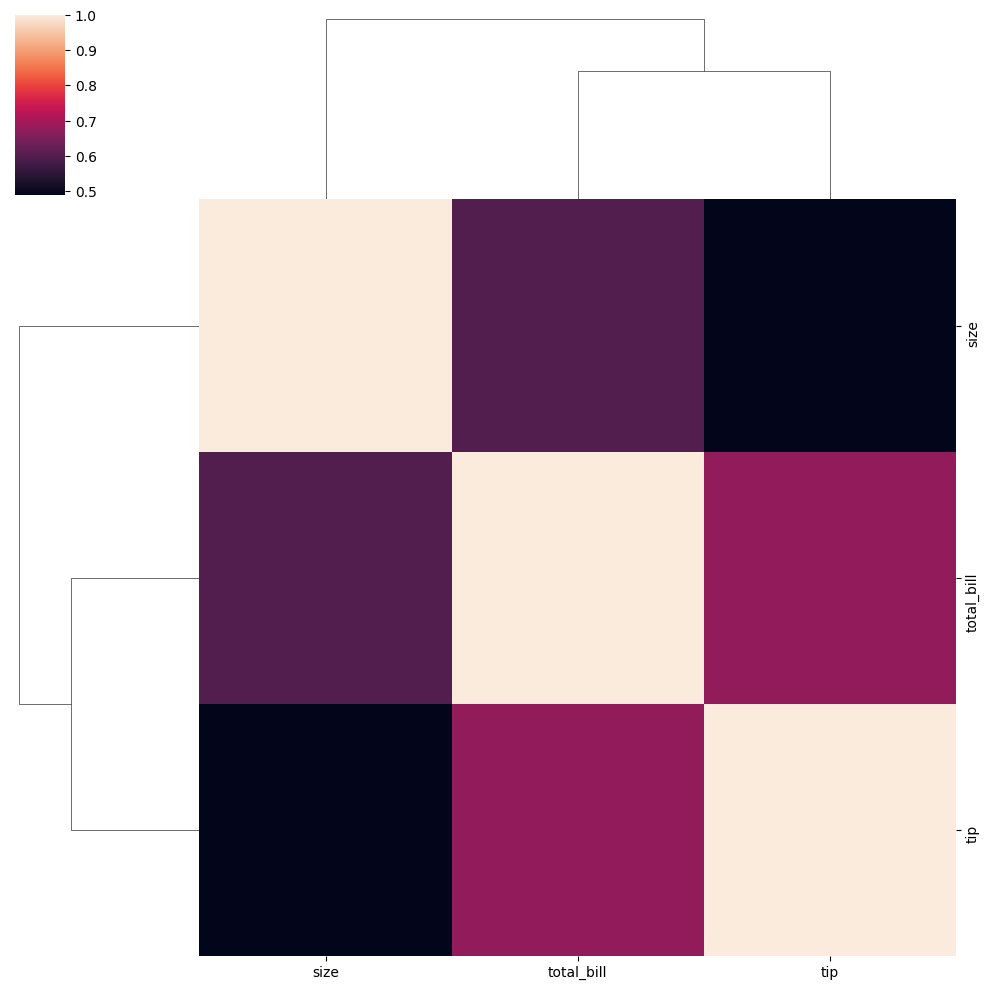

In [293]:
sns.clustermap(tipscorr.corr())

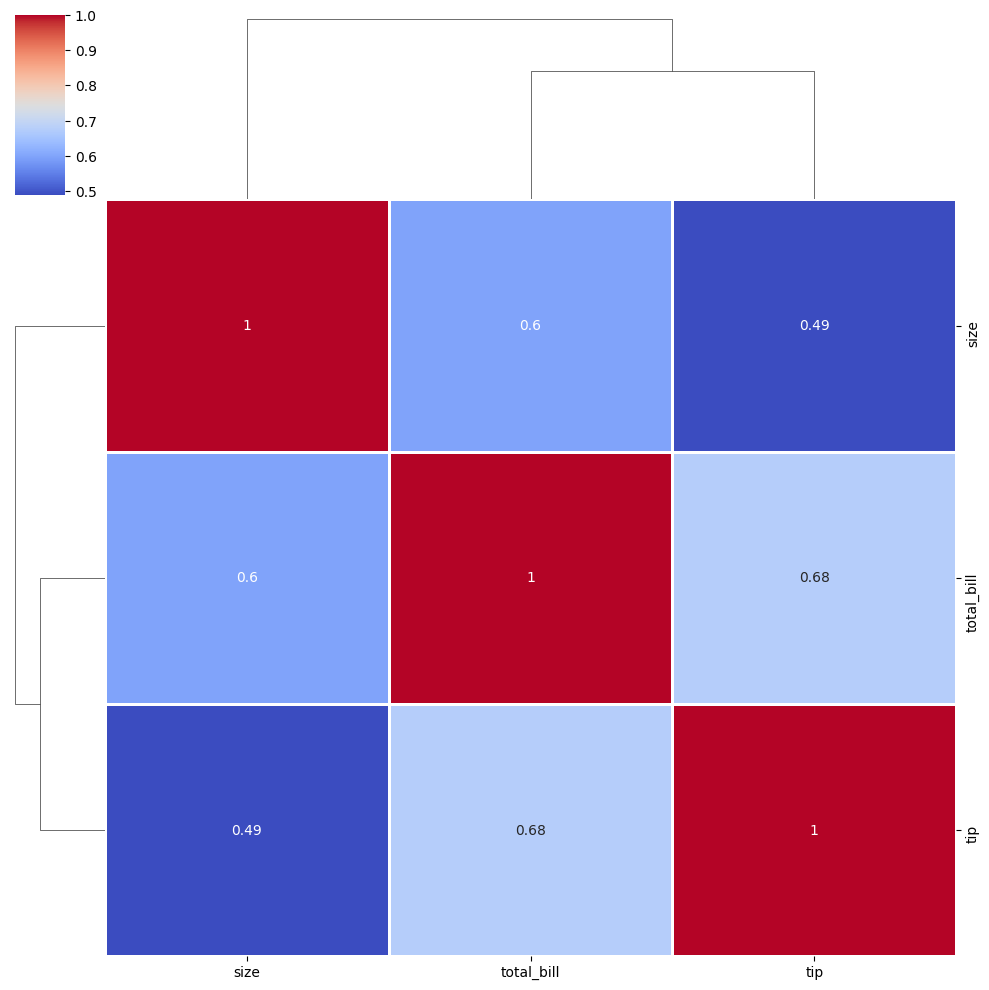

In [294]:
sns.clustermap(
    tipscorr.corr(),              
    cmap="coolwarm",             
    annot=True,                  
    linewidths=.8,               
    dendrogram_ratio=(.1, .2), 
    cbar_pos=(0.02, .8, .05, .18) 
)

### Pivot table Heat map

In [295]:
pvtflight = flights.pivot_table(values = 'passengers',index = 'month',columns = 'year',observed=False)

In [296]:
pvtflight

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

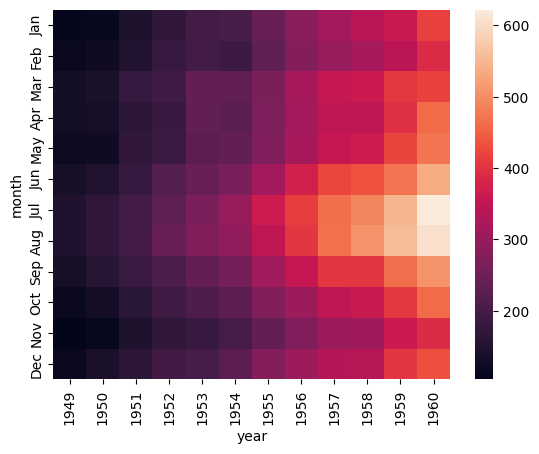

In [297]:
sns.heatmap(pvtflight)

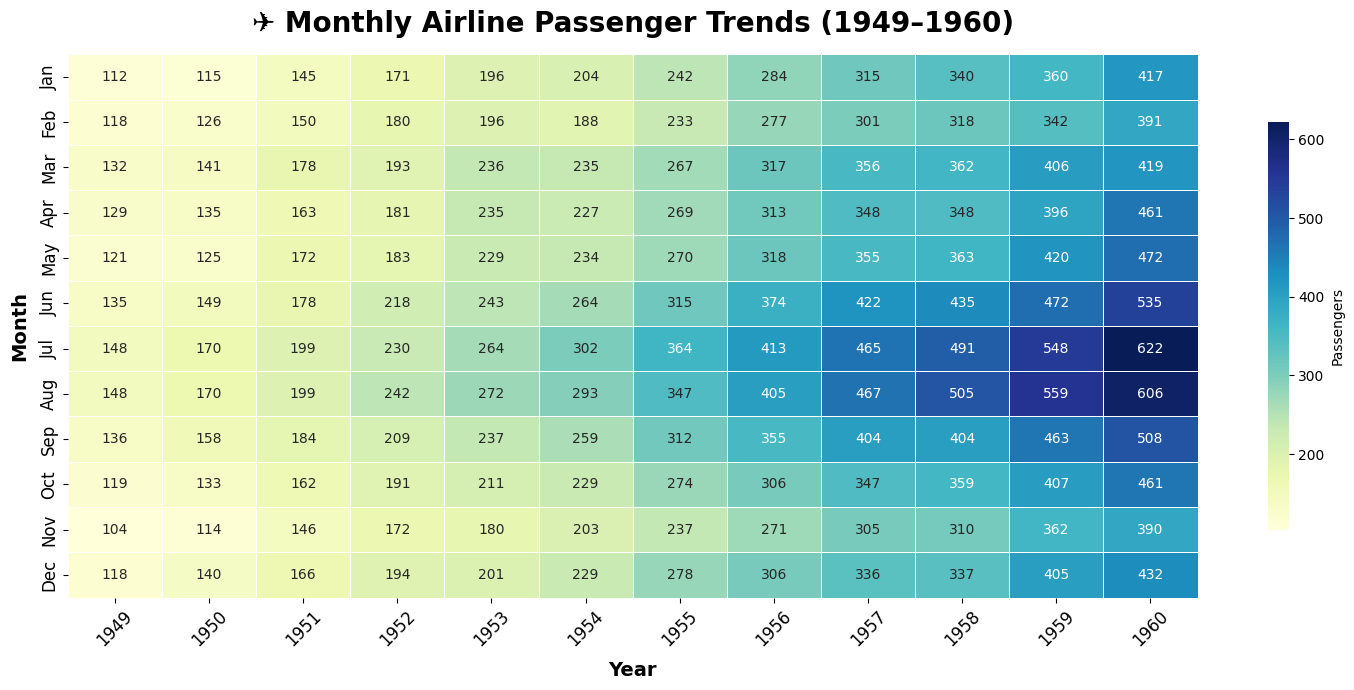

In [298]:
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
pvtflight_clean = pvtflight.reindex(month_order).astype(int)

plt.figure(figsize=(15, 7))

sns.heatmap(
    pvtflight_clean,
    cmap="YlGnBu",            
    annot=True,
    fmt='.0f',
    linewidths=0.6,
    linecolor='white',
    cbar_kws={'label': 'Passengers', 'shrink': 0.75}
)

plt.title("✈️ Monthly Airline Passenger Trends (1949–1960)",
          fontsize=20, fontweight='bold', pad=16)

plt.xlabel("Year", fontsize=14, fontweight='bold', labelpad=8)
plt.ylabel("Month", fontsize=14, fontweight='bold', labelpad=8)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()